# Proposing a machine learning framework for a given problem


Problem Description: The challenge is to categorise several dry bean varieties based on their visual representations. even if a dataset was offered. The steps listed below are used by the suggested framework to complete the process:

Data Collection and Preprocessing: Preprocessing is done on the dataset of dried bean photos with labels identifying the type of bean. In order to have accurate image categorization, preprocessing includes scaling the images to a standard size, turning them into grayscale, and normalising pixel values..

Feature Extraction: Convolutional Neural Networks (CNNs) are frequently used for image classification tasks and have been found to be effective in solving issues of a similar nature. They extract the attributes of the seven classes of dry bean images from high resolution cameras. Therefore, features can be extracted from the preprocessed images using a pre-trained CNN model like VGG or ResNet.

Model Selection:
A strong and popular machine learning approach for classification problems is the decision tree, random forest all classifier, which performs well with high-dimensional feature vectors. could be train a model on the retrieved features using decison tree or random forest.

Model Training and Validation:
To evaluate the performance of the random forest model, a subset of the dataset (for example, 80% of the data) will be used for training and a different subset (for example, 20% of the data) for validation. Metrics including accuracy, precision, recall, and F1-score can be used to gauge the model's effectiveness.

Hyperparameter Tuning:
To enhance the random forest model's performance on the validation set, the hyperparameters, such as the regularisation parameter and the kernel function, will be adjusted. Techniques like Grid Search or Random Search can be used for this..

Model Deployment:
putting model into use. The model can be deployed to categorise fresh dry bean photos in real-time after it has been trained and validated.

The model can be deployed to categorise fresh dry bean photos in real-time after it has been trained and validated. Data gathering and preprocessing, feature extraction using customised approach which a high resolution camera or a pre-trained CNN model, model selection using SVM, model training and validation, hyperparameter tweaking, and model deployment are all included in the proposed machine learning framework for classifying dry beans. The random forest technique was chosen for classification problems because it is strong, popular, and capable of handling feature vectors with a high degree of dimension.

In [1]:
#tools for numerical analysis
import numpy as npy
import pandas as pds 
import seaborn as sbn
import csv, os, random


#important libraries for data analysis
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder as le, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.feature_selection import SelectFromModel

npy.random.seed(42) # random seed setting 

In [2]:
#load Dataset function
path = 'DryBeanDataset.xlsx' # directory path to convert DryBeanDataset
dry_bean_dat = pds.read_excel('DryBeanDataset.xlsx') # load excel file 
dry_bean_dat.to_csv('DryBeanDataset.csv', index=False) #conversion code

def loadData(path):
    dry_bean_dat = pds.read_excel(path)
    return dry_bean_dat #general visualization on the dataset

loadData(path).head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


The Dry Bean Dataset is a real-world dataset that contains several morphological features of seven different types of dry beans, collected from farms located in the Trakya region of Turkey. The dataset contains a total of 13,611 instances (samples) and 16 features (variables).

The dataset consist of 13611 rows and 17 columns

In [3]:
dry_bean_dat.duplicated(subset=None, keep=False).sum() #numbers of duplicated roles

136

i discover a duplicate row in a dataset is a row that has the exact same values in all of its columns as another row in the dataset. Duplicate rows can occur due to errors in data entry or data collection, or due to the merging of multiple datasets. This duplicate dataset could cause skew statistical analysis or machine learning algorithms, as they may artificially inflate the significance of certain values or relationships in the data. 

lets drop duplicate rows

In [4]:
# Syntax of drop_duplicates
#dry_bean_dat1 = dry_bean_dat.drop_duplicates(subset=None, keep=False, inplace=False, ignore_index=False)# drop 136 duplicated rows
#dry_bean_dat1.duplicated(subset=None, keep='first').sum()
dry_bean_dat1 = dry_bean_dat

The dataset consist of 13611 rows and 17 columns

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'MajorAxisLength'}>,
        <Axes: title={'center': 'MinorAxisLength'}>],
       [<Axes: title={'center': 'AspectRation'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'EquivDiameter'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'ShapeFactor1'}>,
        <Axes: title={'center': 'ShapeFactor2'}>,
        <Axes: title={'center': 'ShapeFactor3'}>,
        <Axes: title={'center': 'ShapeFactor4'}>]], dtype=object)

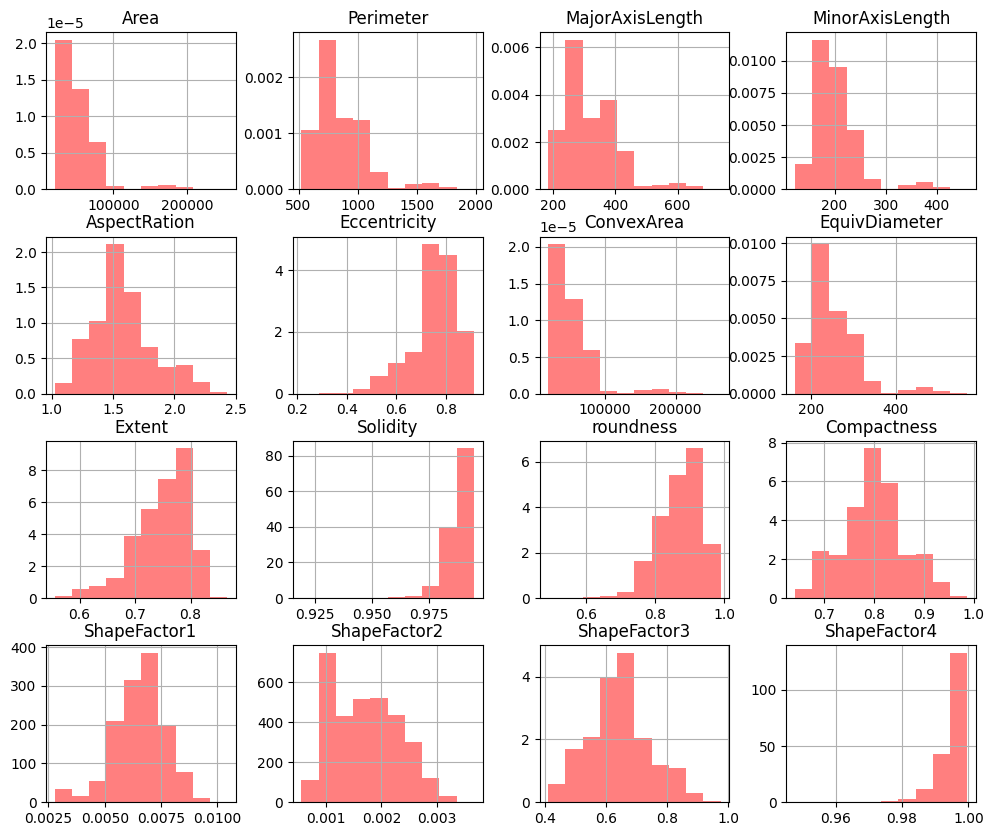

In [5]:
dry_bean_dat1.hist(color='red', figsize=(12, 10), density=True, alpha=0.5) # 

The histogram is a graphical representation of the distribution of a variable in a dataset. In the case of the dry bean dataset, the histogram is used for visualizing the distribution of different features or attributes of the dry bean samples. most of the distributed histogram skew to have a long tail. histogram display several range values of parameters specifical related to the 7 classes of beans. several distributions have long tails and most are bi-modal which means that some bean classes should be quite distinct from others. 

In [6]:
dry_bean_dat1['Class'].unique() #Each row represent the 7 classes of beans

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

The target for the classification are the 7 types of dry beans. These are the dependent variable known as the labels. All the 7 types of beans are represented

In [7]:
dry_bean_dat1['Class'].value_counts() # reveal number of rows each classes of dry bean. 7 unique targets

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

this return classes containing unique values either decending/ascending order of magnitude. Graphically represented below

<Axes: xlabel='count', ylabel='Class'>

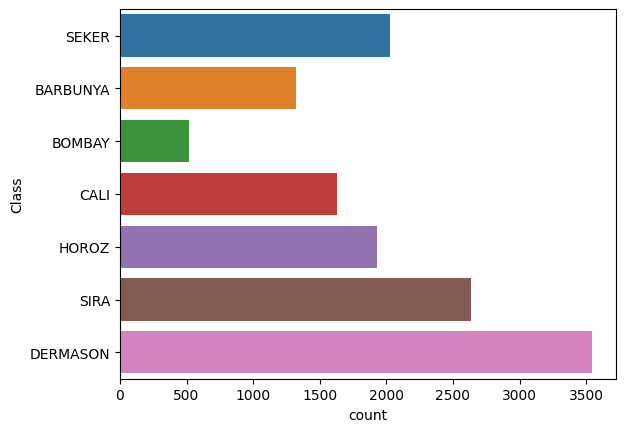

In [8]:
sbn.countplot(y='Class', data=dry_bean_dat1) #using countplotter in seaborn library

from the countplot, the count and distribution of labels category are inbalance with this prediction would be inperfect. furthermore, an inbalance distribution in label in a dataset can negative affect the performance of the model. The issue was handled by deployment of ensemble methods in order to ensure accurate predictions on all classes

In [9]:
dry_bean_dat1.info() #understanding the general information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

with a clear understanding from the dry bean dataset information No missing values in the training dataset but we have to take into consideration.

In [10]:
dry_bean_dat1.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [11]:
dry_bean_dat1.isnull().sum() # checking for any nan values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

# Data Preprocessing

In [12]:
pds.options.mode.chained_assignment = None  # default='warn'

#dry_bean_dat2 = dry_bean_dat1.copy
labelEn = le()
dry_bean_dat1['Class'] = labelEn.fit_transform(dry_bean_dat1['Class'])

Label encoding is a technique used to convert categorical data into numerical data, which can be used as input for machine learning algorithms. In ensemble methods, such as Random Forest, Gradient Boosting, and AdaBoost, label encoding can be used to handle categorical features. coverting veriables 'SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON' into numeric representation 0, 1, 2, 3, 4, 5

In [13]:
dry_bean_dat1['Class'].unique() #check on the classes

array([5, 0, 1, 2, 4, 6, 3])

<Axes: xlabel='count', ylabel='Class'>

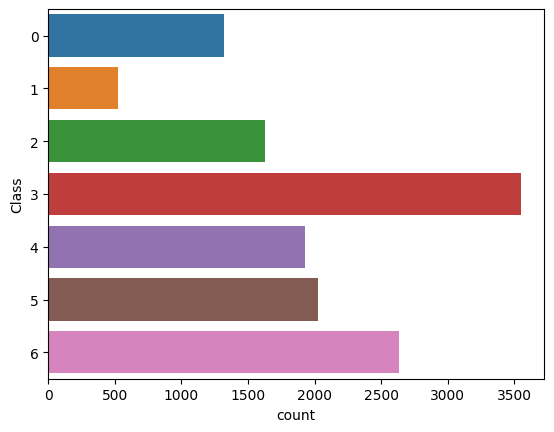

In [14]:
sbn.countplot(y='Class', data=dry_bean_dat1)

<Axes: >

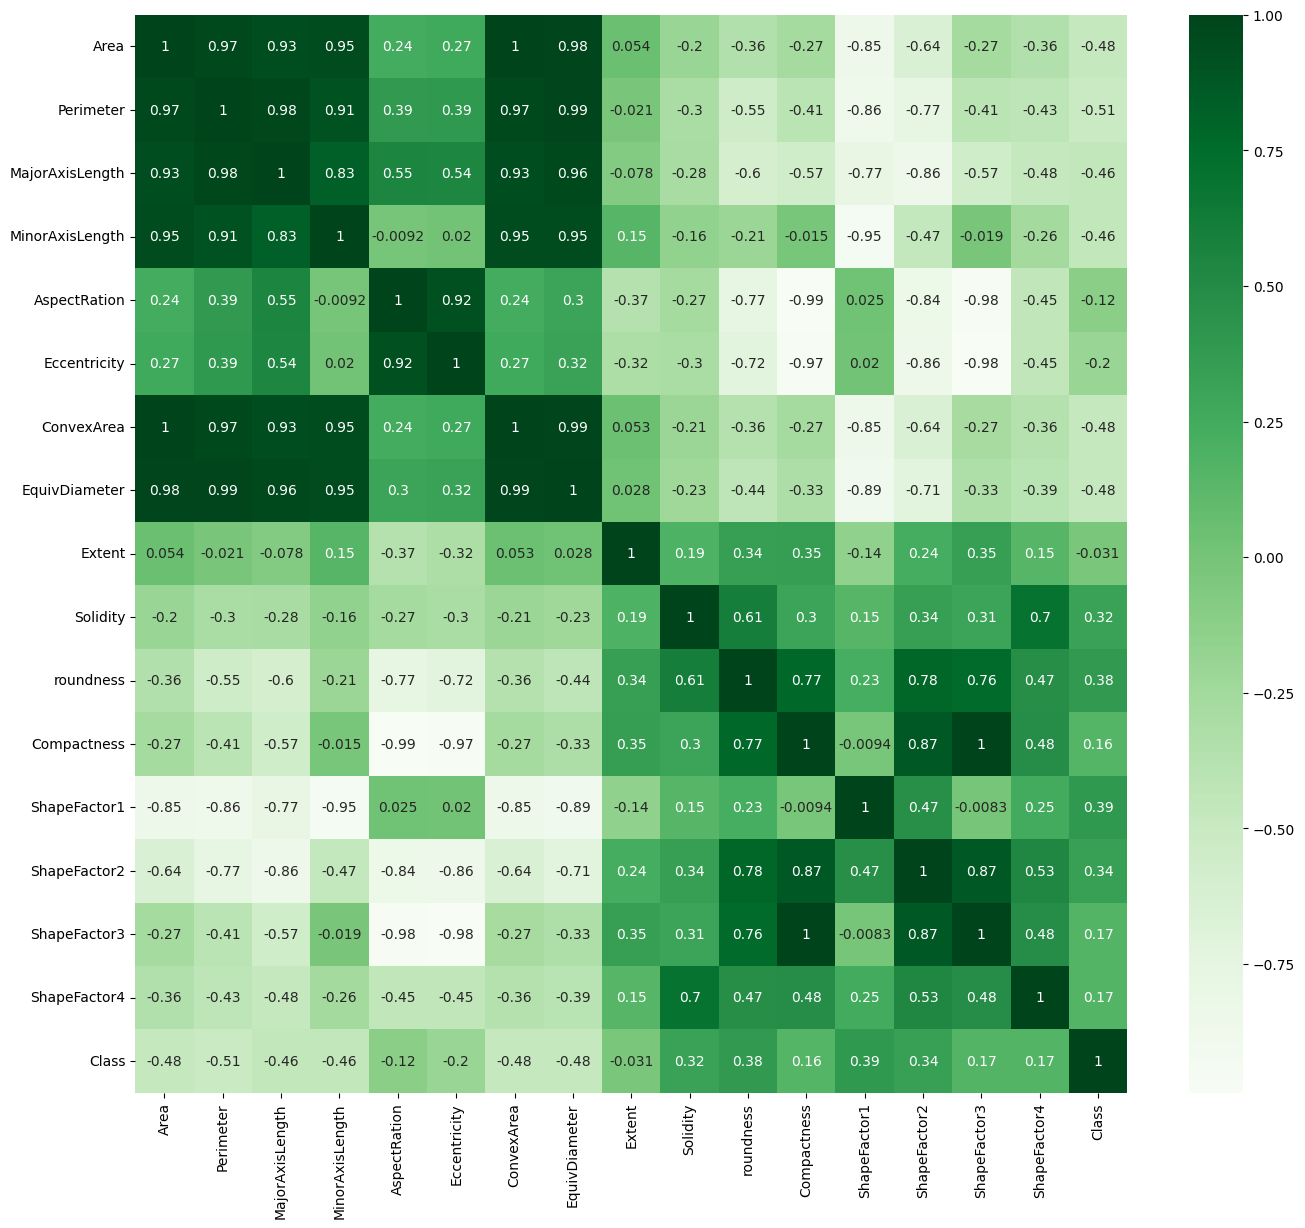

In [15]:
#determine the correlation among the veriables and applying
plt.figure(figsize=(16, 14))
corr = dry_bean_dat1.corr()
sbn.heatmap(corr, annot=True, cmap=plt.cm.Greens)

from the heatmap above it is clear that several parameters like perimeter with 0.97 above etc have a high relationship and shapefactor4 low relationship of value 0.17. we will apply best feature selection. Area: Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter
Perimeter: Area, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter
MajorAxisLength: Area, Perimeter, MinorAxisLength, ConvexArea, EquivDiameter
MinorAxisLength: Area, Perimeter, MajorAxisLength, ConvexArea, EquivDiameter
ConvexArea: Area, Perimeter, MajorAxisLength, MinorAxisLength, EquivDiameter
EquivDiameter: Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea

[9.99967207e-01 3.06176794e-05]


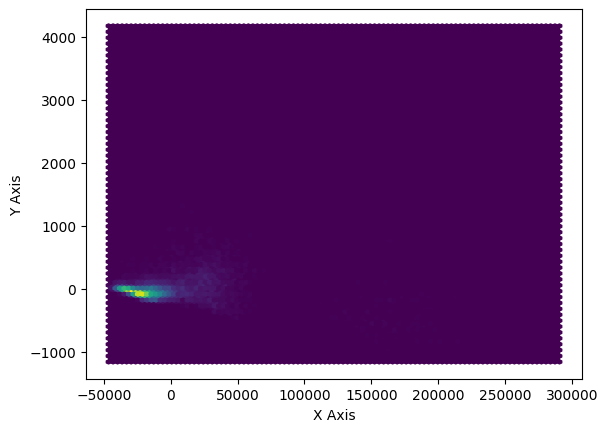

In [17]:
# Create PCA object with desired number of components
pcaDryBean = PCA(n_components=2)

# Fit the model to the data and transform the data
XPca = pcaDryBean.fit_transform(dry_bean_dat1.iloc[:,:-1])

# Print explained variance ratio of each component
print(pcaDryBean.explained_variance_ratio_)

# Visualize the data in the reduced dimensional space
import matplotlib.pyplot as plt
plt.hexbin(XPca[:, 0], XPca[:, 1])
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

Hexbin plots can be an effective tool for observing how data points are distributed in a scatter plot and for spotting patterns or trends in the data.The color density area indicate a strong data point concentration. 99% A high variance ratio for principal component indicates that it captures a large amount of the variability in the data

# Slicing and Split Dataset

In [179]:
# Define the size of each subset
trainSize = 0.6
valSize = 0.2
testSize = 0.2

# Define the total number of samples
nSamples = len(dry_bean_dat1)

# Generate random indices for each subset
trainIdx = npy.random.choice(nSamples, size=int(nSamples*trainSize), replace=False)
valIdx = npy.random.choice(npy.setdiff1d(npy.arange(nSamples), trainIdx), size=int(nSamples*valSize), replace=False)
testIdx = npy.random.choice(npy.setdiff1d(npy.arange(nSamples), npy.union1d(trainIdx, valIdx)), size=int(nSamples*testSize), replace=False)

# Extract data entries for each subset
trainData = dry_bean_dat1.iloc[trainIdx]
validData = dry_bean_dat1.iloc[valIdx]
testData = dry_bean_dat1.iloc[testIdx]

trainDataX = trainData.iloc[:,:-1]
trainDataY = trainData.iloc[:,-1]

testDataX = testData.iloc[:,:-1]
testDataY = testData.iloc[:,-1]

validDataX = validData.iloc[:,:-1]
validDataY = validData.iloc[:,-1]

The code snippet provided randomly splits a pandas DataFrame called 'dry_bean_dat1' into three subsets: training, validation, and testing. The size of each subset is defined as 60% for training, 20% for validation, and 20% for testing. The setdiff1d() function is used to exclude the indices already selected for the training and validation set.  union1d() function, and the replace parameter is set to False to ensure that each index is unique.Train set for training model, validation set for hypertuning to improve the model and test set for predicting labels

# Building Models

building models, hyperparameter tuning, evaluating models, and plotting results for two different classifiers: Random Forest, and Decision Tree.

In [180]:
#building and fitting models

def buildFit(data, labels):
    """
    Returns a dictionary of different models trained on the input data and labels.
    """
        
    # random forest model
    ranModel = RandomForestClassifier(n_estimators=10, random_state=42)
    ranModel.fit(data, labels)
    #ranScore = ranModel.score(data, labels)

    
    # Decision Tree model
    dtModel = DecisionTreeClassifier(random_state=42)
    dtModel.fit(data, labels)
    #dtScore = dtModel.score(data, labels)

    
    return ranModel, dtModel

for i, label in zip([0,1], ['Random Forest', 'Decision Tree']):
    print(buildFit(trainDataX, trainDataY)[i].score(trainDataX, trainDataY), label)
    print(buildFit(trainDataX, trainDataY)[i].score(validDataX, validDataY), label)
    print(buildFit(trainDataX, trainDataY)[i].score(testDataX, testDataY), label)

0.9936321332353661 Random Forest
0.9210139603232917 Random Forest
0.9177075679647319 Random Forest
1.0 Decision Tree
0.8989713445995592 Decision Tree
0.8949301983835415 Decision Tree


having in mind that while a high fitting score on the training set is desirable, it does not necessarily mean that the model will perform well on new, unseen data. To address this issue, it's common to use a separate validation or test set to evaluate the model's performance on new data

# Model Performance Evaluation

In [181]:
for i, label in zip([0,1], ['Random Forest', 'Decision Tree']):    
    print('Accuracy: {:.2f}', format(accuracy_score(testDataY, buildFit(trainDataX, trainDataY)[i].predict(testDataX))), label)
    print('Precison: {:.2f}', format(precision_score(testDataY, buildFit(trainDataX, trainDataY)[i].predict(testDataX), average='weighted')), label)
    print('Recall: {:.2f}', format(recall_score(testDataY, buildFit(trainDataX, trainDataY)[i].predict(testDataX), average='weighted')), label)
    print('F1 Score: {:.2f}', format(f1_score(testDataY, buildFit(trainDataX, trainDataY)[i].predict(testDataX), average='weighted')), label)

Accuracy: {:.2f} 0.9177075679647319 Random Forest
Precison: {:.2f} 0.9177414643957549 Random Forest
Recall: {:.2f} 0.9177075679647319 Random Forest
F1 Score: {:.2f} 0.9173907579895801 Random Forest
Accuracy: {:.2f} 0.8949301983835415 Decision Tree
Precison: {:.2f} 0.895688551347556 Decision Tree
Recall: {:.2f} 0.8949301983835415 Decision Tree
F1 Score: {:.2f} 0.8952120196569714 Decision Tree


The metrics for evaluation of the two models are accuracy, precision, recall and f1 score for the general performance of the machine learning model and evaluation result on the models is good. but require to improved i.e hyperparameter tuning.

In [18]:
#individual classification accuracy of 7 class of dry bean

for p, label in zip([0,1], ['Random Forest', 'Decision Tree']):
    confusionM = confusion_matrix(testDataY, buildFit(trainDataX, trainDataY)[p].predict(testDataX))
    #Calculate the individual classification accuracy
    acc = []
    for i in range(confusionM.shape[0]):
        acc.append(confusionM[i,i]/sum(confusionM[i,:]))

    print('Individual classification accuracy:', acc, label)

NameError: name 'testDataY' is not defined

In [183]:
for l, label in zip([0,1], ['Random Forest', 'Decision Tree']):
    pred = buildFit(trainDataX, trainDataY)[l].predict(testDataX)
    print(label, classification_report(testDataY, pred))
    print()

Random Forest               precision    recall  f1-score   support

           0       0.93      0.90      0.92       271
           1       1.00      0.98      0.99       122
           2       0.94      0.93      0.93       341
           3       0.89      0.94      0.91       722
           4       0.95      0.94      0.95       360
           5       0.93      0.95      0.94       375
           6       0.88      0.83      0.85       531

    accuracy                           0.92      2722
   macro avg       0.93      0.93      0.93      2722
weighted avg       0.92      0.92      0.92      2722


Decision Tree               precision    recall  f1-score   support

           0       0.88      0.87      0.88       271
           1       1.00      0.98      0.99       122
           2       0.92      0.90      0.91       341
           3       0.91      0.89      0.90       722
           4       0.91      0.92      0.92       360
           5       0.93      0.92      0.93      

The purpose of the report is to provide a comprehensive summary of the model's performance, which can be used to identify areas for improvement and guide future development. the comprehensive precision scores of the 7 classified bean image.

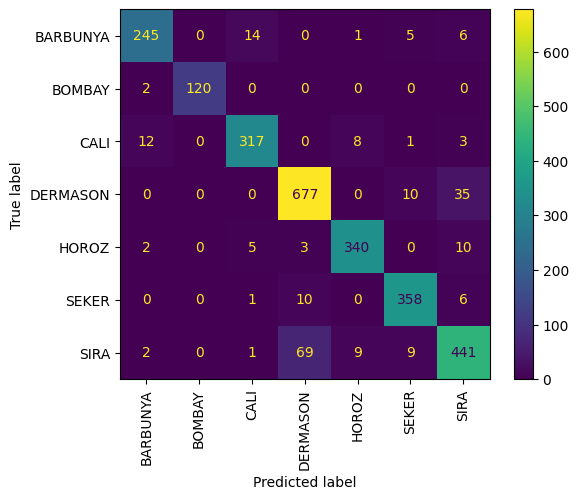

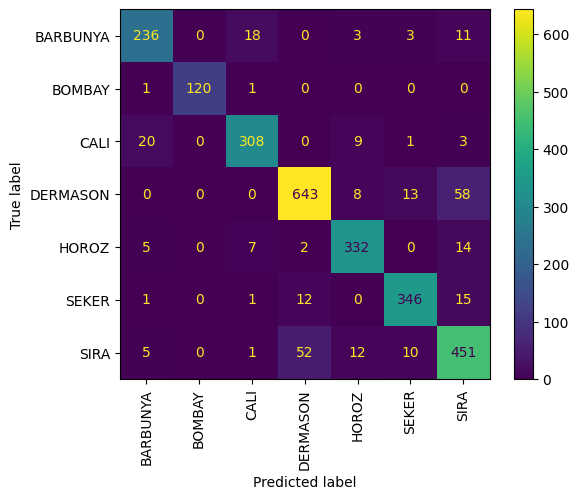

In [184]:
for z, label in zip([0,1], ['Random Forest', 'Decision Tree']):
    cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(testDataY, buildFit(trainDataX, trainDataY)[z].predict(testDataX)), display_labels=npy.unique(labelEn.inverse_transform(dry_bean_dat1['Class'])))
    cmd.plot()
    plt.xticks(rotation=90)
    plt.show()

confusion matrix helps to understand the strengths and weaknesses of the model, and to identify areas for improvement. The first confusion model is randomforest and the second is decision tree. The high number of false positives may indicate that the model is too aggressive in predicting positive instances, while a high number of false negatives may indicate that the model is missing important information. By analyzing the confusion matrix and the associated performance metrics, we can make informed decisions about how to improve the model's performance on the given task. Dermason and Bombay is have zero false positve classification but a true positive classification. This suggest a further improvement on the model is possible by hypertuning the parameter to get the best.

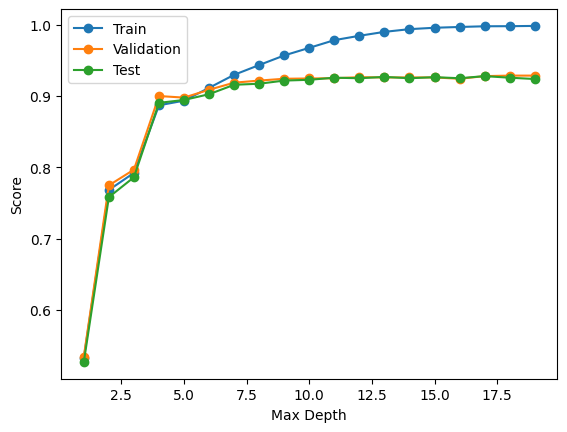

In [185]:
trainScore, validScore, testScore = [], [], []
#determine the depth of the tree to evaluate
valdepth = [k for k in range(1, 20)]

for k in valdepth:
    ranModal = RandomForestClassifier(max_depth=k, random_state=42)
    ranModal.fit(trainDataX, trainDataY)
    trainAcc = ranModal.score(trainDataX, trainDataY)
    trainScore.append(trainAcc)
    validAcc = ranModal.score(validDataX, validDataY)
    validScore.append(validAcc)
    testAcc = ranModal.score(testDataX, testDataY)
    testScore.append(testAcc)
    
    
#visualize the train, test and validation vs depth tree evaluation
plt.plot(valdepth, trainScore, '-o', label='Train')
plt.plot(valdepth, validScore, '-o', label='Validation')
plt.plot(valdepth, testScore, '-o', label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()
plt.show()

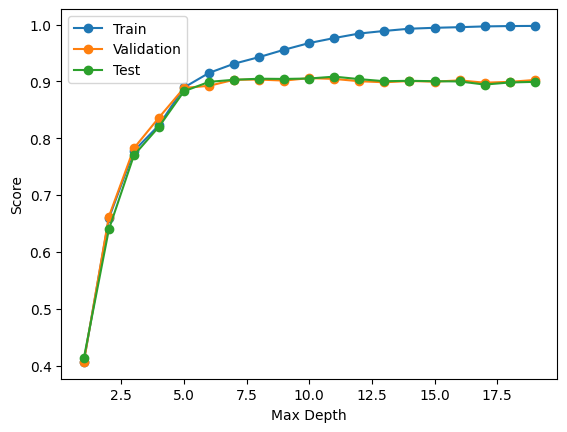

In [186]:
trainScore, validScore, testScore = [], [], []
#determine the depth of the tree to evaluate
valdepth = [k for k in range(1, 20)]

for k in valdepth:
    dtModal = DecisionTreeClassifier(max_depth=k, random_state=42)
    dtModal.fit(trainDataX, trainDataY)
    trainAcc = dtModal.score(trainDataX, trainDataY)
    trainScore.append(trainAcc)
    validAcc = dtModal.score(validDataX, validDataY)
    validScore.append(validAcc)
    testAcc = dtModal.score(testDataX, testDataY)
    testScore.append(testAcc)
    
    
#visualize the train, test and validation vs depth tree evaluation
plt.plot(valdepth, trainScore, '-o', label='Train')
plt.plot(valdepth, validScore, '-o', label='Validation')
plt.plot(valdepth, testScore, '-o', label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()
plt.show()

The x-axis represents the maximum depth of the decision tree and random forest, while the y-axis represents the accuracy. The blue line shows the accuracy on the training set, the green line shows the accuracy on the validation set, and the red line shows the accuracy on the test set. This plot to indecates the optimal depth that maximizes the accuracy on the validation set, while avoiding overfitting on the training set which could be improved further.

# Model Tuning uisng RandomSearchCV Approach

The purpose of using a validation set is to tune the hyperparameters of the model, such as criterion, max_depth etc. The validation set allows for the selection of the best hyperparameters that minimize the model's error on the validation set. After tuning the hyperparameters, the final model is evaluated on the testing data to estimate its generalization performance. This is important to assess the model's ability to make accurate predictions on new, unseen data.

In [187]:
# Define the hyperparameters to search over for each model
param_dist = {
    'n_estimators': randint(10, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(range(5, 30)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rfc = RandomForestClassifier(n_estimators=10)

# run random search
rfcRandom = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    random_state=42
)
rfcRandom.fit(validDataX, validDataY)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20, 21, 22,
                                                      23, 24, 25, 26, 27, 28,
                                                      29],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021968A23460>,
                                        'min_samples_split': <scipy.stats._distn_inf

In [189]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",rfcRandom.best_estimator_)
print("\n The best score across ALL searched params:\n",rfcRandom.best_score_)
print("\n The best parameters across ALL searched params:\n",rfcRandom.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=False, max_depth=25, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=9,
                       n_estimators=55)

 The best score across ALL searched params:
 0.9217552617377226

 The best parameters across ALL searched params:
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 55}


After performing hyper tuning on default random forest model using random search approach actually the model improved with the parameter setting above

In [190]:
# Define the hyperparameter space to search over
dt = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "min_samples_split": randint(2, 11),
              "min_samples_leaf": randint(1, 11),
              "criterion": ["gini", "entropy"]
             }

# Perform the random search
dtTree = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5)
dtTree.fit(validDataX, validDataY)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002196C7120D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021968425A60>})

In [191]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",dtTree.best_estimator_)
print("\n The best score across ALL searched params:\n",dtTree.best_score_)
print("\n The best parameters across ALL searched params:\n",dtTree.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=8)

 The best score across ALL searched params:
 0.9052192390717755

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 8}


After performing hyper tuning on default decision tree model using random search approach actually the model improved from 0.89 to 0.906 with the parameter setting above

In [192]:
RanModalHT = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=25, max_features='sqrt', min_samples_leaf=3, min_samples_split=9, n_estimators=55)
RanModalHT.fit(validDataX, validDataY)

RandomForestClassifier(bootstrap=False, max_depth=25, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=9,
                       n_estimators=55)

In [194]:
dtModalHT = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=4, min_samples_leaf= 8)
dtModalHT.fit(validDataX, validDataY)

DecisionTreeClassifier(min_samples_leaf=8, min_samples_split=4)

# Model Performance  Evaluation

In [196]:
#Cross Validation Score
crossValScoreHT = cross_val_score(RanModalHT, validDataX, validDataY, cv=5, scoring='accuracy')
crossValScoreHT.mean()

0.9217552617377226

In [198]:
#Cross Validation Score
crossValScoreHT = cross_val_score(dtModalHT, validDataX, validDataY, cv=5, scoring='accuracy')
crossValScoreHT.mean()

0.904851592012952

A confrimation of the improved model, a cross validation of 5 fold also was used. this a cofirmation of improved model both in random forest and decision tree

In [199]:
ranPredHT = RanModalHT.predict(testDataX)
print('Accuracy: {:.2f}', format(accuracy_score(testDataY, ranPredHT)))
print('Precison: {:.2f}', format(precision_score(testDataY, ranPredHT, average='macro')))
print('Recall: {:.2f}', format(recall_score(testDataY, ranPredHT, average='macro')))
print('F1 Score: {:.2f}', format(f1_score(testDataY, ranPredHT, average='macro')))

Accuracy: {:.2f} 0.9166054371785451
Precison: {:.2f} 0.9295144168557276
Recall: {:.2f} 0.9226905269851169
F1 Score: {:.2f} 0.9259938980056309


In [201]:
dtPredHT = dtModalHT.predict(testDataX)
print('Accuracy: {:.2f}', format(accuracy_score(testDataY, dtPredHT)))
print('Precison: {:.2f}', format(precision_score(testDataY, dtPredHT, average='macro')))
print('Recall: {:.2f}', format(recall_score(testDataY, dtPredHT, average='macro')))
print('F1 Score: {:.2f}', format(f1_score(testDataY, dtPredHT, average='macro')))

Accuracy: {:.2f} 0.8923585598824394
Precison: {:.2f} 0.9038697439454602
Recall: {:.2f} 0.8996889719634213
F1 Score: {:.2f} 0.9013393803977024


I oberversed increase in precision, recall, f1 score values showing a sign of improved model but a decrease in accuracy i.e why accuracy should alway be a parameter of judgement in machine learning experiments in random forest and decision tree algorithm

In [202]:
#individual classification accuracy of 7 class of dry bean
for p, label in zip([0,1], ['Random Forest', 'Decision Tree']):
    confusionM = confusion_matrix(testDataY, buildFit(validDataX, validDataY)[p].predict(testDataX))
    #Calculate the individual classification accuracy
    acc = []
    for i in range(confusionM.shape[0]):
        acc.append(confusionM[i,i]/sum(confusionM[i,:]))

    print('Individual classification accuracy:', acc, label)

Individual classification accuracy: [0.9114391143911439, 0.9590163934426229, 0.8914956011730205, 0.9335180055401662, 0.9277777777777778, 0.9413333333333334, 0.8418079096045198] Random Forest
Individual classification accuracy: [0.922509225092251, 0.9590163934426229, 0.8504398826979472, 0.8878116343490304, 0.925, 0.9173333333333333, 0.7947269303201506] Decision Tree


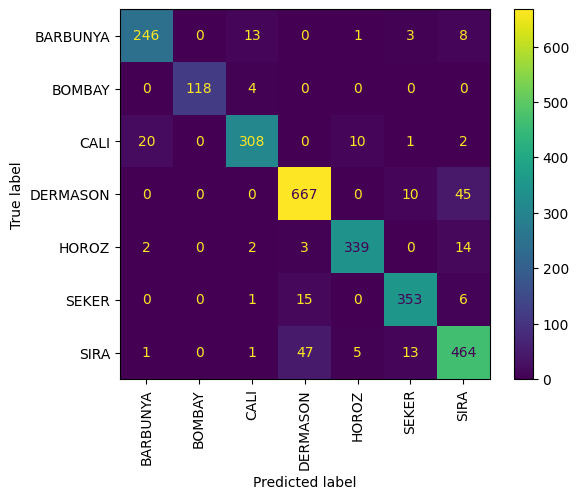

In [203]:
cmdHT = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(testDataY, ranPredHT), display_labels=npy.unique(labelEn.inverse_transform(dry_bean_dat1['Class'])))
cmdHT.plot()
plt.xticks(rotation=90)
plt.show()

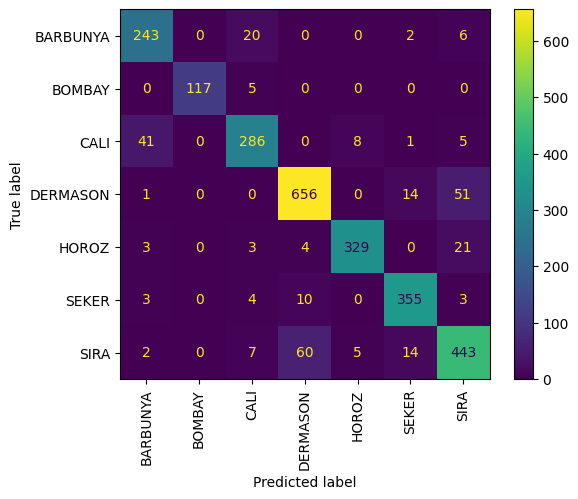

In [204]:
cmdHT = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(testDataY, dtPredHT), display_labels=npy.unique(labelEn.inverse_transform(dry_bean_dat1['Class'])))
cmdHT.plot()
plt.xticks(rotation=90)
plt.show()

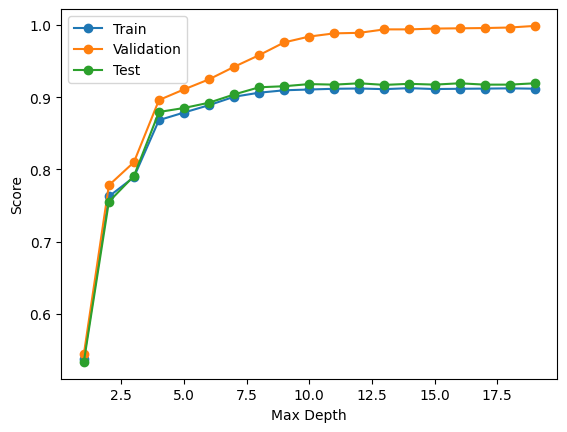

In [205]:
trainScore, validScore, testScore = [], [], []
#determine the depth of the tree to evaluate
valdepth = [k for k in range(1, 20)]

for k in valdepth:
    ranModalHT = RandomForestClassifier(max_depth=k, bootstrap=True, criterion='gini', max_features='log2', min_samples_leaf=1, min_samples_split=4, n_estimators=227)
    ranModalHT.fit(validDataX, validDataY)
    trainAcc = ranModalHT.score(trainDataX, trainDataY)
    trainScore.append(trainAcc)
    validAcc = ranModalHT.score(validDataX, validDataY)
    validScore.append(validAcc)
    testAcc = ranModalHT.score(testDataX, testDataY)
    testScore.append(testAcc)
    
    
#visualize the train, test and validation vs depth tree evaluation
plt.plot(valdepth, trainScore, '-o', label='Train')
plt.plot(valdepth, validScore, '-o', label='Validation')
plt.plot(valdepth, testScore, '-o', label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()
plt.show()

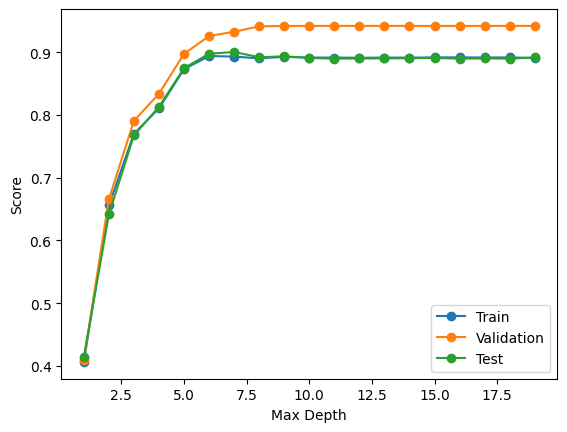

In [206]:
trainScore, validScore, testScore = [], [], []
#determine the depth of the tree to evaluate
valdepth = [k for k in range(1, 20)]

for k in valdepth:
    dtModalHT = DecisionTreeClassifier(max_depth=k, criterion='gini', min_samples_split=17, min_samples_leaf= 7)
    dtModalHT.fit(validDataX, validDataY)
    trainAcc = dtModalHT.score(trainDataX, trainDataY)
    trainScore.append(trainAcc)
    validAcc = dtModalHT.score(validDataX, validDataY)
    validScore.append(validAcc)
    testAcc = dtModalHT.score(testDataX, testDataY)
    testScore.append(testAcc)
    
    
#visualize the train, test and validation vs depth tree evaluation
plt.plot(valdepth, trainScore, '-o', label='Train')
plt.plot(valdepth, validScore, '-o', label='Validation')
plt.plot(valdepth, testScore, '-o', label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()
plt.show()

Overall, the plot of training score, validation score, and test score provides a way to visualize the performance of a machine learning model during training, hyperparameter tuning, and evaluation on new data. the divergence of the test and validation is a indication of good performance.

# Automatic Detection using Supervised Machine Classifier

In [207]:
#rescaling of dataset stome

ST  = SMOTE(random_state=42)
trainDataXm, trainDataYm = ST.fit_resample(trainDataX, trainDataY)

def autoDetect(X,Y):
    svc = SVC()
    svc.fit(trainDataXm,trainDataYm)

    with open('autodetect.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['idx','predicted'])
        for i in range(len(testDataX) - 1):
            writer.writerow([' '.join(str(k) for k in testIdx[i:i+1]), ' '.join(str(k) for k in svc.predict(testDataX[i:i+1]))])

    return testData[:]

autoDetect(trainDataX, trainDataY)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13144,37943,725.296,272.419577,177.735765,1.532722,0.757846,38424,219.796561,0.777903,0.987482,0.906381,0.806831,0.007180,0.001877,0.650976,0.997766,3
10782,27791,613.302,225.660014,156.944243,1.437836,0.718536,28051,188.107948,0.731034,0.990731,0.928464,0.833590,0.008120,0.002418,0.694872,0.999112,3
7946,40843,757.505,285.984877,182.823257,1.564270,0.768977,41264,228.041493,0.807493,0.989797,0.894451,0.797390,0.007002,0.001746,0.635831,0.994611,6
6075,50151,866.456,348.209025,184.365220,1.888692,0.848330,50630,252.693958,0.836687,0.990539,0.839453,0.725696,0.006943,0.001188,0.526635,0.994651,4
2074,51015,859.253,327.857510,198.507869,1.651610,0.795868,51718,254.861365,0.777419,0.986407,0.868292,0.777354,0.006427,0.001448,0.604279,0.998034,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8633,44078,791.066,289.586143,194.495439,1.488910,0.740885,44614,236.900512,0.787839,0.987986,0.885128,0.818066,0.006570,0.001815,0.669232,0.996425,6
7900,40567,745.977,280.418334,184.528409,1.519649,0.752977,40915,227.269683,0.807593,0.991495,0.916077,0.810467,0.006912,0.001840,0.656856,0.998190,6
2887,73151,1038.185,357.102991,262.210292,1.361895,0.678857,74289,305.186412,0.796435,0.984681,0.852866,0.854617,0.004882,0.001606,0.730371,0.994689,0
6426,53447,936.493,372.025377,184.081633,2.020980,0.869002,54285,260.865548,0.613360,0.984563,0.765815,0.701204,0.006961,0.001038,0.491687,0.993689,4
